In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/cansim-0800020-eng-6674700030567901031.csv', skiprows=6, skipfooter=9, engine='python')

In [3]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [4]:
from pandas.tseries.offsets import MonthEnd

In [5]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


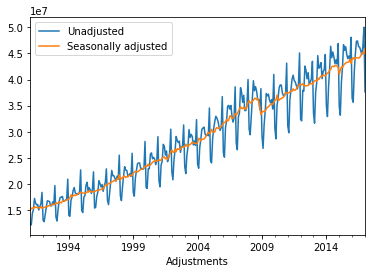

In [6]:
df.plot()

In [7]:
split_date = pd.Timestamp('01-01-2011')

In [8]:
split_date

Timestamp('2011-01-01 00:00:00')

In [9]:
# From beginning upto splitdate
train = df.loc[:split_date, ['Unadjusted']]
# From splitdate to the end
test = df.loc[split_date:, ['Unadjusted']]

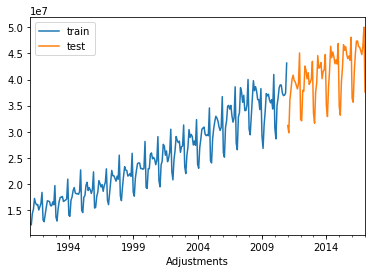

In [10]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [13]:
train_sc[:4]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795]])

# Data split

In [14]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

# Fully connected predictor

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

C:\Users\Shin\Anaconda3\envs\tensorflow_windows\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [17]:
early_stopping = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [18]:
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stopping])

Epoch 1/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0995
Epoch 2/200
239/239 [==============================] - 0s 367us/step - loss: 0.0228
Epoch 3/200
239/239 [==============================] - 0s 389us/step - loss: 0.0179
Epoch 4/200
239/239 [==============================] - 0s 372us/step - loss: 0.0145
Epoch 5/200
239/239 [==============================] - 0s 380us/step - loss: 0.0122
Epoch 6/200
239/239 [==============================] - 0s 373us/step - loss: 0.0110
Epoch 7/200
239/239 [==============================] - 0s 382us/step - loss: 0.0103
Epoch 8/200
239/239 [==============================] - 0s 376us/step - loss: 0.0102
Epoch 9/200
239/239 [==============================] - 0s 373us/step - loss: 0.0100
Epoch 10/200
239/239 [==============================] - 0s 389us/step - loss: 0.0099
Epoch 11/200
239/239 [==============================] - 0s 392us/step - loss: 0.0098
Epoch 12/200
239/239 [==============================] - 0s 375us/step - loss

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred[:5]

array([[0.6196855 ],
       [0.57769126],
       [0.75732607],
       [0.80617946],
       [0.85692203]], dtype=float32)

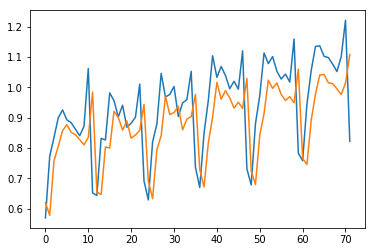

In [21]:
plt.plot(y_test)
plt.plot(y_pred)

# Recurrent predictor

In [22]:
from keras.layers import LSTM

In [23]:
X_train.shape

(239, 1)

In [24]:
# 3d tensor with shape (batch_size, timesteps, input_dim)
X_train[:, None].shape

(239, 1, 1)

In [25]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [26]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stopping])

Epoch 1/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0917
Epoch 2/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 3/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 4/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 5/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 6/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 7/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 8/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 9/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 10/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 11/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 00011: early stopping


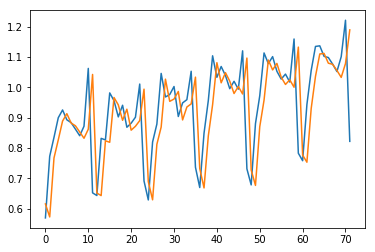

In [28]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

# Windows

In [29]:
train_sc.shape

(240, 1)

In [30]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [31]:
for s in range(1, 13):
    train_sc_df['Shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['Shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [32]:
train_sc_df.head(13)

,Scaled,Shift_1,Shift_2,Shift_3,Shift_4,Shift_5,Shift_6,Shift_7,Shift_8,Shift_9,Shift_10,Shift_11,Shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [35]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [36]:
X_train.shape

(228, 12)

In [37]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

# Fully Connected on Windows

In [38]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stopping])

Epoch 1/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 2/200
228/228 [==============================] - 0s 745us/step - loss: 0.0045
Epoch 3/200
228/228 [==============================] - 0s 765us/step - loss: 0.0037
Epoch 4/200
228/228 [==============================] - 0s 773us/step - loss: 0.0031
Epoch 5/200
228/228 [==============================] - 0s 741us/step - loss: 0.0029
Epoch 6/200
228/228 [==============================] - 0s 749us/step - loss: 0.0025
Epoch 7/200
228/228 [==============================] - 0s 765us/step - loss: 0.0021
Epoch 8/200
228/228 [==============================] - 0s 771us/step - loss: 0.0020
Epoch 9/200
228/228 [==============================] - 0s 724us/step - loss: 0.0019
Epoch 10/200
228/228 [==============================] - 0s 743us/step - loss: 0.0017
Epoch 11/200
228/228 [==============================] - 0s 755us/step - loss: 0.0014
Epoch 12/200
228/228 [==============================] - 0s 737us/step - loss

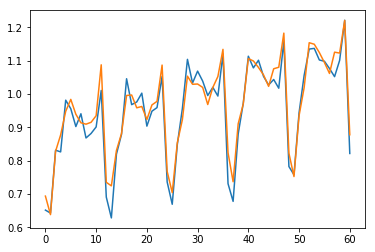

In [41]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

# LSTM on Windows

In [42]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [43]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 12)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early])